In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [2]:
#Importamos los dataset de ciudad de buenos aires de recorridos 
recorridos2020 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2020.csv', delimiter=',',low_memory=False)

In [3]:
recorridos2019 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2019.csv', delimiter=',',low_memory=False)

In [4]:
recorridos2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2018.csv', delimiter=',',low_memory=False)

In [5]:
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950
...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667


In [6]:
#La columna de duracion esta en segundos
#Al parecer la columna unnamed es un indice que no necesitamos
recorridos2020["Unnamed: 0"].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.61103e+05,
       5.61104e+05,         nan])

In [7]:
##Dejar solo el texto en los nombres de estaciones inicio y fin, o sea sacar numeros -
recorridos2020['Nombre_estacion_inicio']=recorridos2020['Nombre de estación de inicio'].str.slice(start=6)
recorridos2020['Nombre_estacion_final']=recorridos2020['Nombre de estación de fin de viaje'].str.slice(start=6)
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Nombre_estacion_inicio,Nombre_estacion_final
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721,Plaza Primero de Mayo,MANZANA 66
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320,General Urquiza,General Urquiza
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663,Acevedo,Malabia
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914,Plaza Alemania,Godoy Cruz y Libertador
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950,ALSINA,Legislatura
...,...,...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368,Parque Las Heras,Parque Las Heras
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224,Federico Lacroze,SANTOS DUMONT Y OTERO
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667,Fitz Roy & Gorriti,Belaustegui
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667,Fitz Roy & Gorriti,Fitz Roy & Gorriti


In [8]:
recorridos2020reor = recorridos2020[['Duración','Id de estación de inicio','Fecha de inicio','Nombre_estacion_inicio','Fecha de fin','Id de estación de fin de viaje','Nombre_estacion_final','ID de ciclista']]
recorridos2020reor

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje,Nombre_estacion_final,ID de ciclista
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,MANZANA 66,155721
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210.0,General Urquiza,191320
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99.0,Malabia,86663
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222.0,Godoy Cruz y Libertador,193914
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441.0,Legislatura,448950
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9.0,Parque Las Heras,5368
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127.0,SANTOS DUMONT Y OTERO,250224
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,Belaustegui,60667
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,Fitz Roy & Gorriti,60667


In [9]:
#vemos la cantidad de nulos que tiene el dataset recorridos2020reor
nulosrecorridos2020reor = (recorridos2020reor.isnull().sum()/recorridos2020reor.isnull().count()).sort_values(ascending=False)
nulosrecorridos2020reor.head(20)

Nombre_estacion_final             0.000001
Id de estación de fin de viaje    0.000001
ID de ciclista                    0.000000
Fecha de fin                      0.000000
Nombre_estacion_inicio            0.000000
Fecha de inicio                   0.000000
Id de estación de inicio          0.000000
Duración                          0.000000
dtype: float64

In [10]:
#eliminamos nulos
recorridos2020final=recorridos2020reor.dropna()
recorridos2020final

,Duración,Id de estación de inicio,Fecha de inicio,Nombre_estacion_inicio,Fecha de fin,Id de estación de fin de viaje,Nombre_estacion_final,ID de ciclista
0,349,75,2020-09-14 11:52:21,Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,MANZANA 66,155721
1,85,210,2020-09-14 11:51:41,General Urquiza,2020-09-14 11:53:06,210.0,General Urquiza,191320
2,311,213,2020-09-14 11:51:12,Acevedo,2020-09-14 11:56:23,99.0,Malabia,86663
3,454,156,2020-09-14 11:50:38,Plaza Alemania,2020-09-14 11:58:12,222.0,Godoy Cruz y Libertador,193914
4,195,24,2020-09-14 11:49:31,ALSINA,2020-09-14 11:52:46,441.0,Legislatura,448950
...,...,...,...,...,...,...,...,...
1438850,1089,9,2020-05-11 10:14:47,Parque Las Heras,2020-05-11 10:32:56,9.0,Parque Las Heras,5368
1438851,290,104,2020-05-11 07:54:14,Federico Lacroze,2020-05-11 07:59:04,127.0,SANTOS DUMONT Y OTERO,250224
1438852,2,206,2020-03-21 18:53:26,Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,Belaustegui,60667
1438853,2,206,2020-03-21 13:16:27,Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,Fitz Roy & Gorriti,60667


In [11]:
recorridos2019


,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:13:58.000000000,2019-11-16 16:59,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:26:56.000000000,2019-11-24 13:51,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:25:06.000000000,2019-12-22 13:54,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:23:43.000000000,2019-12-18 14:04,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo


In [12]:
##Corregir ID usuarios con _0
recorteid  = recorridos2019['id_usuario'].str.split("_", n=2, expand=True) 
recorridos2019['id_usuario_c']=recorteid[0]

##Corregir ID estaciones con _0
recorteiddestino=recorridos2019['id_estacion_destino'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_destino_c']=recorteiddestino[0]
recorteidorigen=recorridos2019['id_estacion_origen'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_origen_c']=recorteidorigen[0]

In [13]:
#Dejar solo texto en nombres estaciones con numero -
recorte_estorigen=recorridos2019['nombre_estacion_origen'].str.split("-",n=1,expand=True)
recorte_estorigen['largo']=recorte_estorigen[0].str.len()
recorte_estorigen

,0,1,largo
0,Estados Unidos,None,14.0
1,Colegio Nacional Buenos Aires,None,29.0
2,Pueyrredón,None,10.0
3,Pueyrredón,None,10.0
4,Legislatura,None,11.0
...,...,...,...
6367309,321,PERITO MORENO,4.0
6367310,321,PERITO MORENO,4.0
6367311,321,PERITO MORENO,4.0
6367312,321,PERITO MORENO,4.0


In [14]:
recorte_estorigen.loc[recorte_estorigen['largo']==4, 'final'] = recorte_estorigen[1]
recorte_estorigen.loc[recorte_estorigen['largo']!=4, 'final'] = recorte_estorigen[0]
recorte_estorigen

,0,1,largo,final
0,Estados Unidos,None,14.0,Estados Unidos
1,Colegio Nacional Buenos Aires,None,29.0,Colegio Nacional Buenos Aires
2,Pueyrredón,None,10.0,Pueyrredón
3,Pueyrredón,None,10.0,Pueyrredón
4,Legislatura,None,11.0,Legislatura
...,...,...,...,...
6367309,321,PERITO MORENO,4.0,PERITO MORENO
6367310,321,PERITO MORENO,4.0,PERITO MORENO
6367311,321,PERITO MORENO,4.0,PERITO MORENO
6367312,321,PERITO MORENO,4.0,PERITO MORENO


In [15]:
recorridos2019['nombre_estacion_origen_c']=recorte_estorigen['final']
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo,115783,112.0,168.0,Estados Unidos
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,Ecoparque,NaN,NaN,NaN,NaN,antiguo,570578,44,144.0,Pueyrredón
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,Ecoparque,NaN,NaN,NaN,NaN,antiguo,588687,44,144.0,Pueyrredón
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo,127201,199.0,16.0,Legislatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,501986,283.0,300.0,PERITO MORENO
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO


In [16]:
#Dejar solo texto en nombres estaciones con numero -
recorte_estdestino=recorridos2019['nombre_estacion_destino'].str.split("-",n=1,expand=True)
recorte_estdestino['largod']=recorte_estdestino[0].str.len()
recorte_estdestino.loc[recorte_estdestino['largod']==4, 'finald'] = recorte_estdestino[1]
recorte_estdestino.loc[recorte_estdestino['largod']!=4, 'finald'] = recorte_estdestino[0]
recorridos2019['nombre_estacion_destino_c']=recorte_estdestino['finald']
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c,nombre_estacion_destino_c
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo,115783,112.0,168.0,Estados Unidos,9 de Julio
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires,Colegio Nacional Buenos Aires
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,NaN,NaN,NaN,NaN,antiguo,570578,44,144.0,Pueyrredón,Ecoparque
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,NaN,NaN,NaN,NaN,antiguo,588687,44,144.0,Pueyrredón,Ecoparque
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo,127201,199.0,16.0,Legislatura,Estados Unidos y Boedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,501986,283.0,300.0,PERITO MORENO,BALDOMERO
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO


In [17]:
#Pasamos la columna de duracion a segundos
recorte  = recorridos2019['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion0=recorte[2]
duracion=duracion0.str.slice(stop=8)
duracion

0          00:07:02
1          00:05:33
2          00:19:45
3          00:19:34
4          00:21:32
             ...   
6367309    00:13:58
6367310    00:26:56
6367311    00:25:06
6367312    00:23:43
6367313    00:30:16
Name: 2, Length: 6367314, dtype: object

In [18]:
minutos=duracion.str.slice(start=3, stop=5)
horas=duracion.str.slice(stop=2)
segundos=duracion.str.slice(start=6,stop=8)
recorridos2019['dur_hs']=horas
recorridos2019['dur_min']=minutos
recorridos2019['dur_seg']=segundos

In [19]:
recorridos2019['duracion_tot_seg'] = recorridos2019['dur_min'].apply(lambda x: x*60)
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,...,servicio,id_usuario_c,id_estacion_destino_c,id_estacion_origen_c,nombre_estacion_origen_c,nombre_estacion_destino_c,dur_hs,dur_min,dur_seg,duracion_tot_seg
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,...,antiguo,115783,112.0,168.0,Estados Unidos,9 de Julio,00,07,02,0707070707070707070707070707070707070707070707...
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,...,antiguo,345364,47.0,47.0,Colegio Nacional Buenos Aires,Colegio Nacional Buenos Aires,00,05,33,0505050505050505050505050505050505050505050505...
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,antiguo,570578,44,144.0,Pueyrredón,Ecoparque,00,19,45,1919191919191919191919191919191919191919191919...
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,...,antiguo,588687,44,144.0,Pueyrredón,Ecoparque,00,19,34,1919191919191919191919191919191919191919191919...
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,...,antiguo,127201,199.0,16.0,Legislatura,Estados Unidos y Boedo,00,21,32,2121212121212121212121212121212121212121212121...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,501986,283.0,300.0,PERITO MORENO,BALDOMERO,00,13,58,1313131313131313131313131313131313131313131313...
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,26,56,2626262626262626262626262626262626262626262626...
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,25,06,2525252525252525252525252525252525252525252525...
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,...,antiguo,352570,283.0,300.0,PERITO MORENO,BALDOMERO,00,23,43,2323232323232323232323232323232323232323232323...


In [20]:
#Debemos establecer cada componente de la duracion como enteros para poder llevarlo a segundos, para eso no debe haber nulos
#vemos la cantidad de nulos que tiene el dataset recorridos2019 para sacar los nulos de la duracion
nulosrecorridos2019 = (recorridos2019.isnull().sum()/recorridos2019.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019.head(30)

genero_usuario                9.679439e-01
edad_usuario                  9.679439e-01
capacidad_estacion_destino    3.438090e-02
capacidad_estacion_origen     3.436363e-02
direccion_estacion_destino    2.040374e-02
direccion_estacion_origen     2.033526e-02
nombre_estacion_origen_c      9.705819e-03
nombre_estacion_destino_c     9.511075e-03
long_estacion_destino         2.686376e-03
lat_estacion_destino          2.686376e-03
long_estacion_origen          2.644757e-03
lat_estacion_origen           2.644757e-03
id_estacion_destino_c         2.325470e-03
id_estacion_destino           2.325470e-03
id_estacion_origen            2.308195e-03
id_estacion_origen_c          2.308195e-03
fecha_destino_recorrido       2.371487e-05
dur_hs                        2.340076e-05
dur_seg                       2.340076e-05
duracion_recorrido            2.340076e-05
dur_min                       2.340076e-05
duracion_tot_seg              2.340076e-05
nombre_estacion_destino       6.282084e-07
nombre_esta

In [21]:
#Antes de eliminar nulos, me quedo con la parte del dataset que me interesa
recorridos2019trim = recorridos2019[['dur_hs','dur_min','dur_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c',]]
recorridos2019trim

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [22]:
nulosrecorridos2019trim = (recorridos2019trim.isnull().sum()/recorridos2019trim.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019trim.head(30)

nombre_estacion_origen_c     0.009706
nombre_estacion_destino_c    0.009511
id_estacion_destino_c        0.002325
id_estacion_origen_c         0.002308
fecha_destino_recorrido      0.000024
dur_seg                      0.000023
dur_min                      0.000023
dur_hs                       0.000023
id_usuario_c                 0.000000
fecha_origen_recorrido       0.000000
dtype: float64

In [23]:
recorridos2019limpio=recorridos2019trim.dropna()
recorridos2019limpio

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [24]:
recorridos2019limpio['dur_hs_int'] = recorridos2019limpio['dur_hs'].astype(int)
recorridos2019limpio['dur_min_int'] = recorridos2019limpio['dur_min'].astype(int)
recorridos2019limpio['dur_seg_int'] = recorridos2019limpio['dur_seg'].astype(int)
recorridos2019limpio['id_usuario_c_int']= recorridos2019limpio['id_usuario_c'].astype(int)
recorridos2019limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c,dur_hs_int,dur_min_int,dur_seg_int,id_usuario_c_int
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783,0,7,2,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364,0,5,33,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578,0,19,45,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687,0,19,34,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201,0,21,32,127201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,0,13,58,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,0,26,56,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,0,25,6,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,0,23,43,352570


In [25]:
#ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2019limpio['duracion_tot_seg'] = recorridos2019limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2019limpio['dur_seg_int'] + recorridos2019limpio['dur_hs_int'].apply(lambda x: x*3600)
recorridos2019limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c,dur_hs_int,dur_min_int,dur_seg_int,id_usuario_c_int,duracion_tot_seg
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783,0,7,2,115783,422
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364,0,5,33,345364,333
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578,0,19,45,570578,1185
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687,0,19,34,588687,1174
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201,0,21,32,127201,1292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,0,13,58,501986,838
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,0,26,56,352570,1616
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,0,25,6,352570,1506
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,0,23,43,352570,1423


In [26]:
#Ahora, finalmente, tenemos nuestra tabla 2019 lista!
recorridos2019final=recorridos2019limpio[['duracion_tot_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c_int',]]
recorridos2019final

,duracion_tot_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c_int
0,422,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,333,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,1185,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,1174,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,1292,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...
6367309,838,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,1616,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,1506,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,1423,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [27]:
#Vamos con 2018
recorridos2018


,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,190597,M,2018-12-30 19:46:32,75.0,Plaza Primero de Mayo,-58.398905,-34.612124,Pichincha entre Adolfo Alsina y Moreno,0 days 00:07:15.000000000,2018-12-30 19:53:47,118.0,México,-58.402827,-34.616813,Saavedra y México
2619964,119885,F,2018-12-30 19:48:14,139.0,Virrey Liniers,-58.413150,-34.633309,Salcedo 3401 y Virrey Liniers,0 days 00:09:59.000000000,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,-58.415882,-34.622439,Estados Unidos 3568 entre Boedo y Maza
2619965,652034,F,2018-12-30 19:48:51,30.0,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:10:32.000000000,2018-12-30 19:59:23,76.0,Ayacucho,-58.394927,-34.607573,Ayacucho entre Perón Juan y Bartolomé Mitre
2619966,467438,M,2018-12-30 19:51:42,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan,0 days 00:09:57.000000000,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan


In [28]:
#Pasamos la columna de duracion a segundos
recorte18  = recorridos2018['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion018=recorte18[2]
duracion18=duracion018.str.slice(stop=8)
duracion18

0          00:19:53
1          00:26:19
2          00:27:39
3          00:48:51
4          00:49:27
             ...   
2619963    00:07:15
2619964    00:09:59
2619965    00:10:32
2619966    00:09:57
2619967    00:10:26
Name: 2, Length: 2619968, dtype: object

In [29]:
minutos18=duracion18.str.slice(start=3, stop=5)
horas18=duracion18.str.slice(stop=2)
segundos18=duracion18.str.slice(start=6,stop=8)
recorridos2018['dur_hs']=horas18
recorridos2018['dur_min']=minutos18
recorridos2018['dur_seg']=segundos18
recorridos2018

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino,dur_hs,dur_min,dur_seg
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís,00,19,53
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...,00,26,19
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av,00,27,39
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa,00,48,51
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa,00,49,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,190597,M,2018-12-30 19:46:32,75.0,Plaza Primero de Mayo,-58.398905,-34.612124,Pichincha entre Adolfo Alsina y Moreno,0 days 00:07:15.000000000,2018-12-30 19:53:47,118.0,México,-58.402827,-34.616813,Saavedra y México,00,07,15
2619964,119885,F,2018-12-30 19:48:14,139.0,Virrey Liniers,-58.413150,-34.633309,Salcedo 3401 y Virrey Liniers,0 days 00:09:59.000000000,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,-58.415882,-34.622439,Estados Unidos 3568 entre Boedo y Maza,00,09,59
2619965,652034,F,2018-12-30 19:48:51,30.0,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:10:32.000000000,2018-12-30 19:59:23,76.0,Ayacucho,-58.394927,-34.607573,Ayacucho entre Perón Juan y Bartolomé Mitre,00,10,32
2619966,467438,M,2018-12-30 19:51:42,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan,0 days 00:09:57.000000000,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan,00,09,57


In [30]:
recorridos2018reor = recorridos2018[['dur_hs','dur_min','dur_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]

In [31]:
recorridos2018reor

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [32]:
#vemos la cantidad de nulos que tiene el dataset recorridos2018reor
percent2018 = (recorridos2018reor.isnull().sum()/recorridos2018reor.isnull().count()).sort_values(ascending=False)
percent2018.head(20)

fecha_destino_recorrido    0.016688
dur_seg                    0.016688
dur_min                    0.016688
dur_hs                     0.016688
id_estacion_destino        0.011636
id_estacion_origen         0.011536
id_usuario                 0.000000
nombre_estacion_destino    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
dtype: float64

In [33]:
recorridos2018limpio=recorridos2018reor.dropna()
recorridos2018limpio

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [34]:
recorridos2018limpio['dur_hs_int'] = recorridos2018limpio['dur_hs'].astype(int)
recorridos2018limpio['dur_min_int'] = recorridos2018limpio['dur_min'].astype(int)
recorridos2018limpio['dur_seg_int'] = recorridos2018limpio['dur_seg'].astype(int)
recorridos2018limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,dur_hs_int,dur_min_int,dur_seg_int
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453,0,19,53
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673,0,26,19
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119,0,27,39
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147,0,48,51
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156,0,49,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597,0,7,15
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885,0,9,59
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034,0,10,32
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438,0,9,57


In [35]:
#ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2018limpio['duracion_tot_seg'] = recorridos2018limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2018limpio['dur_seg_int'] + recorridos2018limpio['dur_hs_int'].apply(lambda x: x*3600)
recorridos2018limpio

C:\Users\limat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,dur_hs_int,dur_min_int,dur_seg_int,duracion_tot_seg
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453,0,19,53,1193
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673,0,26,19,1579
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119,0,27,39,1659
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147,0,48,51,2931
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156,0,49,27,2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597,0,7,15,435
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885,0,9,59,599
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034,0,10,32,632
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438,0,9,57,597


In [36]:
#Ahora tenemos tabla 2018 lista. 
recorridos2018final=recorridos2018limpio[['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,1193,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,1579,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,1659,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,2931,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,2967,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...
2619963,435,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,599,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,632,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,597,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [37]:
#Unificamos los nombres 
recorridos2020final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']
recorridos2019final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

#Armamos la tabla de recorridos totales! 
recorridos1920=recorridos2020final.append(recorridos2019final, ignore_index=True)
recorridos=recorridos2018final.append(recorridos1920, ignore_index=True)
recorridos

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...
10184168,838,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
10184169,1616,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
10184170,1506,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
10184171,1423,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [38]:
recorridos.dtypes

duracion_tot_seg            int64
id_estacion_origen         object
fecha_origen_recorrido     object
nombre_estacion_origen     object
fecha_destino_recorrido    object
id_estacion_destino        object
nombre_estacion_destino    object
id_usuario                  int64
dtype: object

In [39]:
recorridos.describe(include = "all")

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
count,1.018417e+07,10184173,10184173,10184173,10184173,10184173,10184173,1.018417e+07
unique,NaN,704,5665434,915,5621270,825,922,NaN
top,NaN,175.0,2019-10-07 17:57,Parque Las Heras,2019-10-10 19:22,175.0,Parque Las Heras,NaN
freq,NaN,86248,202,83776,66,84187,81017,NaN
mean,1.666273e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.828421e+05
std,2.687076e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.975519e+05
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00
25%,6.770000e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.064670e+05
50%,1.140000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.594000e+05
75%,1.916000e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.379410e+05


In [40]:
#Vamos a trabajar con la fecha de inicio 
recorridos.fecha_origen_recorrido = pd.to_datetime(recorridos.fecha_origen_recorrido) 
recorridos['anio'] = recorridos.fecha_origen_recorrido.dt.year
recorridos['mes '] = recorridos.fecha_origen_recorrido.dt.month
recorridos['dia'] = recorridos.fecha_origen_recorrido.dt.day
recorridos['franja_horaria'] = recorridos.fecha_origen_recorrido.dt.hour 

recorridos.head()

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,anio,mes,dia,franja_horaria
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,2018,1,1,0
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,2018,1,1,0
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,2018,1,1,0
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,2018,1,1,0
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,2018,1,1,0


In [41]:
recorridos["franja_horaria"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [42]:
# Vamos a importar las tablas con la informacion de los usuarios para traernos sexo y edad

In [43]:
#importamos tabla usuarios de 2015,2016,2017 y 2018. 
usuarios2015 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
usuarios2016 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
usuarios2017 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
usuarios2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)

In [44]:
usuarios2015

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,7682,M,45,2015-02-28,17:32:55.087
1,19577,M,47,2015-02-28,17:33:12.227
2,108635,M,26,2015-02-28,17:35:13.800
3,129948,M,29,2015-02-28,17:35:42.780
4,129949,M,24,2015-02-28,17:35:42.780
...,...,...,...,...,...
40392,218844,M,46,2015-12-31,17:14:38.960
40393,222867,M,28,2015-12-31,17:15:24.820
40394,223653,M,28,2015-12-31,17:17:49.683
40395,223845,F,44,2015-12-31,17:18:55.370


In [45]:
usuarios2016

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,223858,M,41,2016-01-01,03:45:19.040
1,223873,M,35,2016-01-01,12:36:42.073
2,223874,M,47,2016-01-01,12:45:43.570
3,223875,F,42,2016-01-01,12:54:43.570
4,223876,M,49,2016-01-01,12:58:38.463
...,...,...,...,...,...
39476,336095,M,28,2016-12-31,20:36:57.560
39477,336102,M,23,2016-12-31,21:29:28.100
39478,336104,M,23,2016-12-31,22:11:50.170
39479,336107,F,24,2016-12-31,22:57:19.137


In [46]:
usuarios2017

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247
...,...,...,...,...,...
58217,494627,M,28,2017-12-31,10:07:52.700
58218,494641,F,26,2017-12-31,11:03:15.327
58219,494659,F,59,2017-12-31,13:02:09.137
58220,494664,F,61,2017-12-31,13:17:42.250


In [47]:
usuarios2018

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42
...,...,...,...,...,...
56177,630106,M,28,04/11/2018,5:58:12
56178,630108,M,24,11/10/2018,5:57:48
56179,630113,F,23,13/10/2018,5:57:50
56180,630116,M,27,07/10/2018,5:57:44


In [48]:
usuarios1718=usuarios2017.append(usuarios2018, ignore_index=True)
usuarios1516=usuarios2015.append(usuarios2016, ignore_index=True)
usuarios=usuarios1718.append(usuarios1516, ignore_index=True)
usuarios

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247
...,...,...,...,...,...
194277,336095,M,28,2016-12-31,20:36:57.560
194278,336102,M,23,2016-12-31,21:29:28.100
194279,336104,M,23,2016-12-31,22:11:50.170
194280,336107,F,24,2016-12-31,22:57:19.137


In [49]:
#Se concatenaron bien!
40397+39481+58222+56182

194282

In [50]:
#Uno el dataet de recorridos con el dataset de usuarios
recorridos_por_usuario = recorridos.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
recorridos_por_usuario

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,anio,mes,dia,franja_horaria,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,2018,1,1,0,NaN,NaN,NaN,NaN,NaN
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,2018,1,1,0,NaN,NaN,NaN,NaN,NaN
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,2018,1,1,0,179119.0,F,51.0,2015-06-30,13:00:10.340
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,2018,1,1,0,400147.0,M,27.0,2017-05-23,13:39:10.897
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,2018,1,1,0,400156.0,F,27.0,2017-05-23,13:53:10.617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184385,838,300.0,2019-11-16 16:45:00,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,2019,11,16,16,501986.0,F,34.0,18/01/2018,5:53:22
10184386,1616,300.0,2019-11-24 13:24:00,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,2019,11,24,13,352570.0,F,22.0,2017-02-09,10:14:48.947
10184387,1506,300.0,2019-12-22 13:29:00,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,2019,12,22,13,352570.0,F,22.0,2017-02-09,10:14:48.947
10184388,1423,300.0,2019-12-18 13:40:00,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,2019,12,18,13,352570.0,F,22.0,2017-02-09,10:14:48.947


In [51]:
#vemos la cantidad de nulos que tiene el dataset recorridos_por_usuario
nulosrecorridosporusuario = (recorridos_por_usuario.isnull().sum()/recorridos_por_usuario.isnull().count()).sort_values(ascending=False)
nulosrecorridosporusuario

usuario_sexo               0.623830
hora_alta                  0.623649
usuario_edad               0.623649
usuario_id                 0.623649
fecha_alta                 0.623649
id_estacion_destino        0.000000
id_estacion_origen         0.000000
fecha_origen_recorrido     0.000000
nombre_estacion_origen     0.000000
fecha_destino_recorrido    0.000000
anio                       0.000000
nombre_estacion_destino    0.000000
id_usuario                 0.000000
mes                        0.000000
dia                        0.000000
franja_horaria             0.000000
duracion_tot_seg           0.000000
dtype: float64

In [52]:
#Vamos a investigar donde estan los nulos
#Uno el dataet de recorridos 2018 final con el dataset de usuarios
recorridos_por_usuario2018 = recorridos2018final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
nulosrecorridosporusuario2018 = (recorridos_por_usuario2018.isnull().sum()/recorridos_por_usuario2018.isnull().count()).sort_values(ascending=False)
nulosrecorridosporusuario2018

usuario_sexo               0.253518
hora_alta                  0.253474
fecha_alta                 0.253474
usuario_edad               0.253474
usuario_id                 0.253474
id_usuario                 0.000000
nombre_estacion_destino    0.000000
id_estacion_destino        0.000000
fecha_destino_recorrido    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
id_estacion_origen         0.000000
duracion_tot_seg           0.000000
dtype: float64

In [53]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios
#En el dataset original teniamos el 100% del sexo del usuario
recorridos_por_usuario2018orig = recorridos2018.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
nulosrecorridosporusuario2018orig = (recorridos_por_usuario2018orig.isnull().sum()/recorridos_por_usuario2018orig.isnull().count()).sort_values(ascending=False)
nulosrecorridosporusuario2018orig

usuario_sexo                  0.252953
hora_alta                     0.252909
fecha_alta                    0.252909
usuario_edad                  0.252909
usuario_id                    0.252909
dur_seg                       0.016688
dur_min                       0.016688
dur_hs                        0.016688
duracion_recorrido            0.016688
fecha_destino_recorrido       0.016688
id_estacion_destino           0.011636
long_estacion_destino         0.011636
lat_estacion_destino          0.011636
domicilio_estacion_destino    0.011636
domicilio_estacion_origen     0.011536
lat_estacion_origen           0.011536
long_estacion_origen          0.011536
id_estacion_origen            0.011536
fecha_origen_recorrido        0.000000
genero_usuario                0.000000
nombre_estacion_destino       0.000000
nombre_estacion_origen        0.000000
id_usuario                    0.000000
dtype: float64

In [54]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios 2018
#Usar todos los usuarios creados desde 2015 mejoro el valor de nulos!
recorridos18_usuarios18= recorridos2018.merge(usuarios2018, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
recorridos18_usuarios18nulls = (recorridos18_usuarios18.isnull().sum()/recorridos18_usuarios18.isnull().count()).sort_values(ascending=False)
recorridos18_usuarios18nulls

hora_alta                     0.701817
fecha_alta                    0.701817
usuario_edad                  0.701817
usuario_sexo                  0.701817
usuario_id                    0.701817
dur_seg                       0.016688
dur_min                       0.016688
dur_hs                        0.016688
duracion_recorrido            0.016688
fecha_destino_recorrido       0.016688
id_estacion_destino           0.011636
long_estacion_destino         0.011636
lat_estacion_destino          0.011636
domicilio_estacion_destino    0.011636
domicilio_estacion_origen     0.011536
lat_estacion_origen           0.011536
long_estacion_origen          0.011536
id_estacion_origen            0.011536
fecha_origen_recorrido        0.000000
genero_usuario                0.000000
nombre_estacion_destino       0.000000
nombre_estacion_origen        0.000000
id_usuario                    0.000000
dtype: float64

In [55]:
#Uno el dataet de recorridos 2020 final con el dataset de usuarios
#La mayoria de los nulos estan en 2020 
recorridos_por_usuario2020 = recorridos2020final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
nulosrecorridosporusuario2020= (recorridos_por_usuario2020.isnull().sum()/recorridos_por_usuario2020.isnull().count()).sort_values(ascending=False)
nulosrecorridosporusuario2020

usuario_sexo               0.821322
hora_alta                  0.821206
fecha_alta                 0.821206
usuario_edad               0.821206
usuario_id                 0.821206
id_usuario                 0.000000
nombre_estacion_destino    0.000000
id_estacion_destino        0.000000
fecha_destino_recorrido    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
id_estacion_origen         0.000000
duracion_tot_seg           0.000000
dtype: float64

In [56]:
#Uno el dataet de recorridos 2019 final con el dataset de usuarios
#En 2019 tambien hay bastantes nulos
recorridos_por_usuario2019 = recorridos2019final.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
nulosrecorridosporusuario2019= (recorridos_por_usuario2019.isnull().sum()/recorridos_por_usuario2019.isnull().count()).sort_values(ascending=False)
nulosrecorridosporusuario2019

usuario_sexo               0.728129
hora_alta                  0.727877
fecha_alta                 0.727877
usuario_edad               0.727877
usuario_id                 0.727877
id_usuario                 0.000000
nombre_estacion_destino    0.000000
id_estacion_destino        0.000000
fecha_destino_recorrido    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
id_estacion_origen         0.000000
duracion_tot_seg           0.000000
dtype: float64

In [57]:
#Por ahora vamos a usar la tabla recorridos!

In [65]:
recorridos.dtypes

duracion_tot_seg                    int64
id_estacion_origen                 object
fecha_origen_recorrido     datetime64[ns]
nombre_estacion_origen             object
fecha_destino_recorrido            object
id_estacion_destino                object
nombre_estacion_destino            object
id_usuario                          int64
anio                                int64
mes                                 int64
dia                                 int64
franja_horaria                      int64
aniomes                             int64
dtype: object

In [66]:
#Concatenamos año y mes para poder hacer un countplot
recorridos['aniomes'] = recorridos['anio'].apply(str) +'-'+recorridos['mes '].apply(str)
recorridos

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,anio,mes,dia,franja_horaria,aniomes
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,2018,1,1,0,2018-1
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,2018,1,1,0,2018-1
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,2018,1,1,0,2018-1
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,2018,1,1,0,2018-1
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,2018,1,1,0,2018-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184168,838,300.0,2019-11-16 16:45:00,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986,2019,11,16,16,2019-11
10184169,1616,300.0,2019-11-24 13:24:00,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570,2019,11,24,13,2019-11
10184170,1506,300.0,2019-12-22 13:29:00,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570,2019,12,22,13,2019-12
10184171,1423,300.0,2019-12-18 13:40:00,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570,2019,12,18,13,2019-12


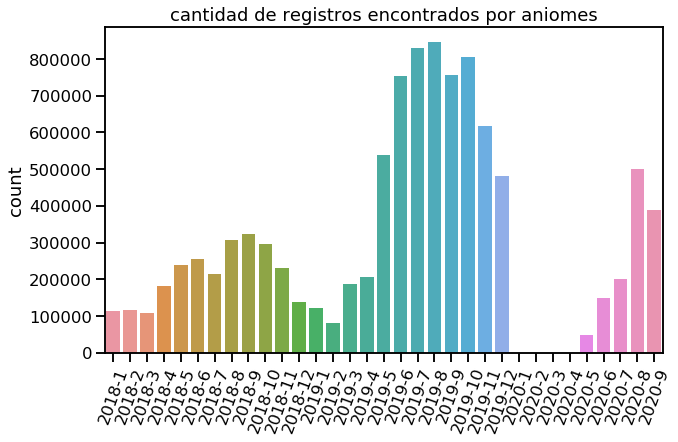

In [78]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(recorridos.aniomes.values,order=['2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12','2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12','2020-1','2020-2','2020-3','2020-4','2020-5','2020-6','2020-7','2020-8','2020-9'])
plt.title("cantidad de registros encontrados por aniomes")
plt.xticks(rotation=70)
plt.show()

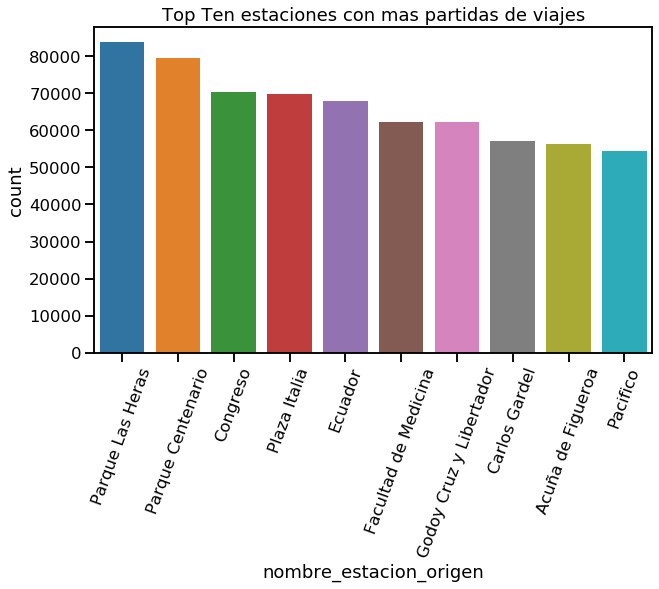

In [95]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_origen",data=recorridos, 
            order=recorridos.nombre_estacion_origen.value_counts().iloc[:10].index)
plt.title("Top Ten estaciones con mas partidas de viajes")
plt.xticks(rotation=70)
plt.show()

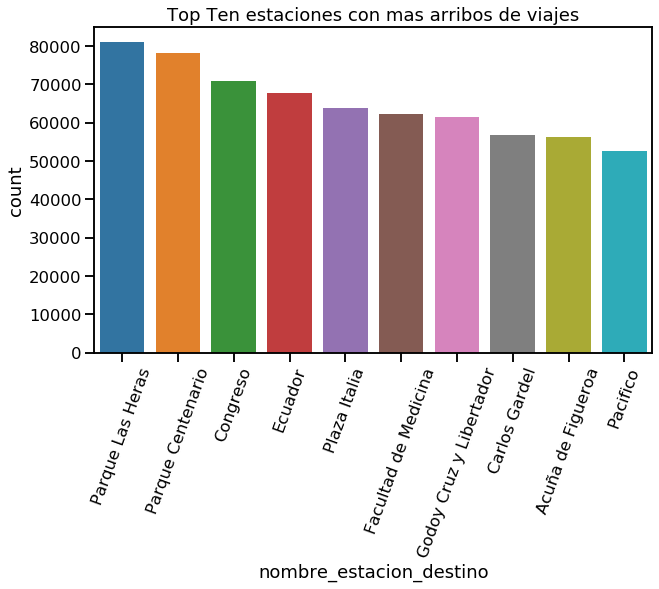

In [96]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_destino",data=recorridos, 
            order=recorridos.nombre_estacion_destino.value_counts().iloc[:10].index)
plt.title("Top Ten estaciones con mas arribos de viajes")
plt.xticks(rotation=70)
plt.show()